# SENTIMENT REPORT

We load the files extracted from Pybossa with the annotated data.

In [25]:
from pybossa import *
import pandas as pd

filewithids = 'csv/tweets.csv'

taskjsonpath= 'footballsentiment_task.json'

taskrunjsonpath = 'footballsentiment_task_run.json'

numberofcategories = 3


With these documents we generate the report files executing the function pybossaReport.
This function returns the Fleiss` kappa of the experimentation

In [27]:
# Si no hay golden poner None
pybossaReport(filewithids, taskjsonpath, taskrunjsonpath, numberofcategories, None)

-0.5


Here is presented each user with its Majority trust.

In [28]:
usertweetinfo = pd.read_csv('usertweetinfo.csv', encoding="utf-8")
usertweetinfo = usertweetinfo[['User','Majority trust']]
usertweetinfo[572:574]

,User,Majority trust
572,27,0.047256
573,27,0.047256


## MAJORITY REPORT

We load the majority report generated in pybossaReport.

In [29]:
majoritypercent = pd.read_csv('majoritypercent.csv', encoding="utf-8")

majoritypercent[:5]

,id_str,Tweet,Negativo,Neutro,Positivo
0,"9,71414330725069E+017",@AS_Manolete Y con el atleti podemos soñar otr...,0.066231,0.084888,0.000000
1,"9,71414177666478E+017",@eSports_Barca @MNDZPAU1 Md,0.000000,0.151119,0.000000
2,"9,71414161606501E+017",Ahhhh claro que es del Atleti https://t.co/xm4...,0.084888,0.066231,0.000000
3,"9,71414116270305E+017",Que venga Arthur me tiene más emocionado que c...,0.000000,0.000000,0.151119
4,"9,7141400299889E+017",Me ha gustado un vídeo de @YouTube (https://t....,0.000000,0.000000,0.151119


We create the column sentiment with the most chosen answer according to the user`s majority confidence.

In [30]:
majoritypercent['Sentiment'] = 0
majoritypercent.loc[majoritypercent["Sentiment"] == 0, "Sentiment"] = ((majoritypercent.Positivo > majoritypercent.Negativo) & (majoritypercent.Positivo > majoritypercent.Neutro)).astype(int)
majoritypercent.loc[majoritypercent["Sentiment"] == 0, "Sentiment"] = ((majoritypercent.Negativo > majoritypercent.Positivo) & (majoritypercent.Negativo > majoritypercent.Neutro)).astype(int)+2 
majoritypercent.loc[majoritypercent["Sentiment"] == 1, "Sentiment"] = "Positive"
majoritypercent.loc[majoritypercent["Sentiment"] == 2, "Sentiment"] = "Neutral"
majoritypercent.loc[majoritypercent["Sentiment"] == 3, "Sentiment"] = "Negative"

We create the column FullAgreement to identify in which tweets it has been full agreement in the chosen answer.

In [31]:
majoritypercent['FullAgreement']=0
majoritypercent.FullAgreement = (((majoritypercent.Positivo != 0)&(majoritypercent.Neutro != 0)) | ((majoritypercent.Positivo != 0)&(majoritypercent.Negativo != 0)) | ((majoritypercent.Negativo != 0)&(majoritypercent.Neutro != 0))).astype(int)
majoritypercent.loc[majoritypercent["FullAgreement"] == 0, "FullAgreement"] = "Yes"
majoritypercent.loc[majoritypercent["FullAgreement"] == 1, "FullAgreement"] = "No"

These are the columns we are interested for the experimentation report.

In [37]:
majority1 = majoritypercent[['Tweet','Positivo','Negativo','Neutro','Sentiment','FullAgreement']]
majority1[:5]

,Tweet,Positivo,Negativo,Neutro,Sentiment,FullAgreement
0,@AS_Manolete Y con el atleti podemos soñar otr...,0.000000,0.066231,0.084888,Neutral,No
1,@eSports_Barca @MNDZPAU1 Md,0.000000,0.000000,0.151119,Neutral,Yes
2,Ahhhh claro que es del Atleti https://t.co/xm4...,0.000000,0.084888,0.066231,Negative,No
3,Que venga Arthur me tiene más emocionado que c...,0.151119,0.000000,0.000000,Positive,Yes
4,Me ha gustado un vídeo de @YouTube (https://t....,0.151119,0.000000,0.000000,Positive,Yes


The number of tweets where it has been full agreement.

In [38]:
import seaborn as sns
majority1.groupby('FullAgreement').size()

FullAgreement
No     316
Yes    340
dtype: int64

Full agreement graphic.

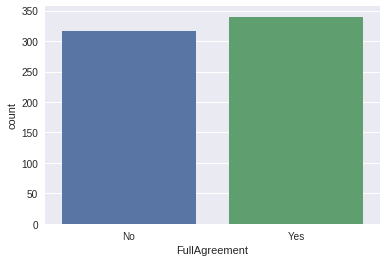

In [39]:
sns.countplot('FullAgreement', data=majority1)

The number of chosen answers.

In [40]:
majority1.groupby('Sentiment').size()

Sentiment
Negative    248
Neutral     274
Positive    134
dtype: int64

Chosen answers graphic.

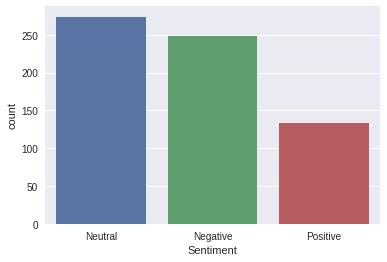

In [41]:
sns.countplot('Sentiment', data=majority1)